# Question 3
Ticket Pricing for Top 1000 Contiguous State City Pairs in Domestic Routes, USA 2021, quarter 4


### Part 2: Data Requirements

 | Variable| Description|
 | -------------- | ------------- |  
 | year |year|                                                    | quarter | Quarter | 
 | Citymarketid_1 | City Market ID and identification number assigned by US..|
 | Citymarketid_2 | City Market ID and identification number assigned by us.. |
 | City1 | City is used to consolidate airports serving the same city..|
 | City2 | City is used to consolidate airports serving the same city..|
 |nsmiles | Non-Stop market miles (using radian measure) |
 | pressengers | pressenger per day |
 | fare |Overall average fare|
 |Carrier_lg | Carrier with the the largest market share |
 |large_ms | Market share for the carrier with the largest market share |
 | fare_lg | Average fare for the carrier with the largest market share |
 | carrier_low | Carrier with the lowest fare |
 | if_ms | Market share for the carrier with lowest fare |
 | fare_low | Average fare for the carrier with lowest fare |
 | table_1_flag | Flag for Table 1 subset. Top 1,000 Contiguous State City pairs | 

In [1]:
!pip install -U scikit-learn

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets


### Part 3: Data Collection
Load the json:


In [69]:
path = 'https://data.transportation.gov/resource/4f3n-jbg2.json'
df = pd.read_json(path)

In [70]:
df.head()

,year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag
0,2021,4,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,16203.369570,168.443679,B6,0.326355,149.470002,B6,0.326355,149.470002,-1
1,2021,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,13816.521740,131.529620,WN,0.605262,125.510351,WN,0.605262,125.510351,-1
2,2021,4,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,11944.782610,341.074980,UA,0.277991,320.647700,B6,0.261684,299.356984,-1
3,2021,4,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,9709.347826,154.128011,B6,0.360522,156.056453,B6,0.360522,156.056453,-1
4,2021,4,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,7842.826087,159.425601,UA,0.355767,163.772739,DL,0.195900,159.819986,-1


### Display the size of the imported json file

In [71]:
df.shape


(1000, 16)

In [72]:
df.dtypes

year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
nsmiles             int64
passengers        float64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
table_1_flag        int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


### Data Wrangling


### Part 4: Data Understanding and Preparation




In [73]:
df_quar4=df.query('quarter > 3')
df_quar4.head()        

,year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag
0,2021,4,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,16203.369570,168.443679,B6,0.326355,149.470002,B6,0.326355,149.470002,-1
1,2021,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,13816.521740,131.529620,WN,0.605262,125.510351,WN,0.605262,125.510351,-1
2,2021,4,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,11944.782610,341.074980,UA,0.277991,320.647700,B6,0.261684,299.356984,-1
3,2021,4,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,9709.347826,154.128011,B6,0.360522,156.056453,B6,0.360522,156.056453,-1
4,2021,4,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,7842.826087,159.425601,UA,0.355767,163.772739,DL,0.195900,159.819986,-1


In [74]:
df_quar4.shape


(1000, 16)

In [75]:
df_quar4.tail()

,year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag
995,2021,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",2468,177.500000,352.580220,AA,0.330067,354.057143,WN,0.208818,279.137830,-1
996,2021,4,32467,33316,"Miami, FL (Metropolitan Area)","Omaha, NE",1393,176.956522,245.146745,AA,0.350737,279.508581,WN,0.292998,212.437526,-1
997,2021,4,31721,34082,"Flint, MI","Punta Gorda, FL",1111,176.739130,117.127306,G4,1.000000,117.127306,G4,1.000000,117.127306,-1
998,2021,4,30423,31453,"Austin, TX","Houston, TX",148,176.739130,151.387700,WN,0.518450,142.420759,WN,0.518450,142.420759,-1
999,2021,4,30977,33728,"Chicago, IL","Pensacola, FL",794,176.630435,215.372861,UA,0.362462,229.339049,WN,0.226462,188.792120,-1


### All data from quarter 4


In [76]:
df_quar4.set_index("year", inplace=True)

In [77]:
df_quar4.drop(["table_1_flag"], axis=1, inplace=True)
df_quar4.head()

,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
year,,,,,,,,,,,,,,
2021,4,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,16203.369570,168.443679,B6,0.326355,149.470002,B6,0.326355,149.470002
2021,4,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,13816.521740,131.529620,WN,0.605262,125.510351,WN,0.605262,125.510351
2021,4,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,11944.782610,341.074980,UA,0.277991,320.647700,B6,0.261684,299.356984
2021,4,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,9709.347826,154.128011,B6,0.360522,156.056453,B6,0.360522,156.056453
2021,4,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,7842.826087,159.425601,UA,0.355767,163.772739,DL,0.195900,159.819986


In [78]:
df_quar4.describe()

,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.0,31502.442000,32291.232000,1062.012000,885.227500,204.301241,0.569327,208.069576,0.302711,166.985317
std,0.0,1218.148708,1421.454688,595.573824,1262.797853,50.526601,0.174704,56.309613,0.211642,53.751909
min,4.0,30135.000000,30189.000000,129.000000,176.630435,84.636979,0.220136,84.636979,0.010013,69.962963
25%,4.0,30466.000000,30852.000000,602.000000,276.576087,165.700202,0.429780,166.892717,0.144207,125.424904
50%,4.0,31057.000000,32211.000000,930.000000,469.945652,196.060543,0.542536,200.916982,0.251940,159.162477
75%,4.0,32242.500000,33342.000000,1418.500000,964.103261,234.936081,0.701151,242.636454,0.400131,202.000734
max,4.0,35412.000000,35412.000000,2724.000000,16203.369570,357.569849,1.000000,419.447844,1.000000,335.310795


### Part 1 : Analytic Approach



In [79]:
df_quar4.corr()['fare'].sort_values()

lf_ms            -0.273058
large_ms         -0.109974
passengers       -0.103912
citymarketid_2    0.038144
citymarketid_1    0.053965
fare_low          0.726975
nsmiles           0.799990
fare_lg           0.927883
fare              1.000000
quarter                NaN
Name: fare, dtype: float64

<AxesSubplot:xlabel='nsmiles', ylabel='fare'>

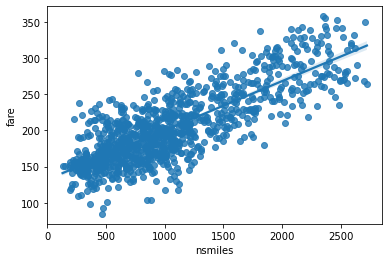

In [80]:
sns.regplot(x='nsmiles', y='fare', data=df_quar4)

<AxesSubplot:xlabel='passengers', ylabel='fare'>

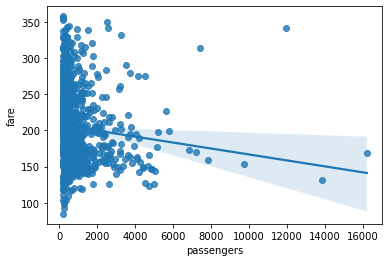

In [45]:
sns.regplot(x='passengers', y='fare', data=df)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [46]:
df.corr()['fare'].sort_values()

lf_ms            -0.276702
large_ms         -0.113474
passengers       -0.102688
citymarketid_2    0.035719
citymarketid_1    0.053540
fare_low          0.727152
nsmiles           0.799247
fare_lg           0.928078
fare              1.000000
quarter                NaN
Name: fare, dtype: float64

### Part 5: Model Development


We can Fit a linear regression model using the  Nonstop  Domestic Route feature <code>'nsmiles'</code> and  caculate the R^2.


In [87]:
X = df_quar4[['nsmiles']]
Y = df_quar4['fare']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.6399832689937093

### 

Fit a linear regression model to predict the <code>'fare'</code> using the feature <code>'fare_lg'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.


In [88]:
x = df[['fare_lg']]
y = df['fare']
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.8609663352963519

### 

Fit a linear regression model to predict the <code>'fare'</code> using the list of features:

In [89]:
features =df_quar4[["fare_low", "nsmiles","fare_lg"]]     

Then calculate the R^2. Take a screenshot of your code.


In [90]:
x = features
y = df_quar4['fare']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9168336999781774

### 

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [93]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### 

Use the list to create a pipeline object to predict the 'fare', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [94]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [95]:
pipe.fit(x,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [96]:
pipe.score(x,y)

0.9436448306684645

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [99]:
features =["fare_low", "nsmiles","fare_lg"]    
X = df[features]
Y = df['fare']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 150
number of training samples: 850


### 

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [100]:
from sklearn.linear_model import Ridge

In [101]:
Model = Ridge(alpha=0.1)
Model.fit(x_train, y_train)
Model.score(x_test, y_test)

0.933997772911022

### 

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [102]:
pr = PolynomialFeatures(degree=2, include_bias=False)
pn_x_train = pr.fit_transform(x_train)
pn_x_test = pr.transform(x_test)
RM = Ridge(alpha=0.1)
RM.fit(pn_x_train, y_train)
RM.score(pn_x_test, y_test)

0.952247933528518